# Plotten van 3-dimensionale grafieken met behulp van het matplotlib pakket.

Met behulp van het pakket matplotlib kan men zeer geavanceerde figuren maken: figuren binnen figuren, alle mogelijke kleuren, 
2d en 3d figuren, bewegende figuren, enz... 
Wie zich daarin wil uitleven of daarvan gebruik wil maken, bijvoorbeeld in het kader van een eindwerk, kan hier meer informatie
vinden: https://matplotlib.org/stable/

In het kader van de cursus "Wiskundige modellen en systemen 2: schakelprogramma" volstaat het echter relatief eenvoudige
3d-figuren te maken: grafieken van functies van 2 veranderlijken, ruimtekrommen, enz... 

In dit document zullen we bespreken hoe dergelijke grafieken relatief eenvoudig kunnen gemaakt worden. 

## 1. Grafiek van een functie van 2 veranderlijken $z=f(x,y)$ en van een impliciet gedefinieerde functie $F(x,y,z)=0$ 

### 1.1 Klassieke manier om $z=f(x,y)$ te plotten

We maken hieronder als uitgewerkt voorbeeld de grafiek van de functies $z=f(x,y)=\sqrt{4-x^2 -y^2}$ en $z=g(x,y)=-\sqrt{4-x^2 -y^2}$. 
Deze grafieken zijn de bovenste en onderste helft van het boloppervlak met vergelijking $x^2 +y^2 +z^2 =2^2$ met
centrum in $(0,0,0)$ en met straal $R=2$.

In [80]:
%matplotlib inline
# activeer interactieve plots: doe dit ALTIJD, dit is handig bij 3d-grafieken! 

In [81]:
import matplotlib.pyplot as plt
import numpy as np

In [82]:
x=np.linspace(-3,3,100)
y=np.linspace(-3,3,100)
x,y=np.meshgrid(x,y)
# Maak een rooster van 100x100 punten in het (x,y)-gebied x tussen -3 en 3,   
# y tussen -3 en 3. In deze punten zal de functie numeriek berekend worden. 

f= lambda x,y : np.sqrt(4-x**2-y**2)
# Gebruik "Lambda" om de functie te definiëren, NIET het commando "def". 
# Dit laatste kan tot softwareconflicten leiden. 
    
z=f(x,y)

# Hier kan een waarschuwing komen omdat voor sommige (x,y)-waarden de 
# uitdrukking onder de vierkantswortel negatief is. 


C:\Users\arnog\AppData\Local\Temp\ipykernel_22904\1565864223.py:7: RuntimeWarning: invalid value encountered in sqrt
  f= lambda x,y : np.sqrt(4-x**2-y**2)


Hieronder definiëren we een lege figuur (fig=plt.figure()) met de naam "fig". 
In matplotlib is een "axes" (afgekort "ax") iets dat je toevoegt aan een figuur (een "subplot"), niet te verwarren met "axis" dat "as" (x-as, y-as,...) betekent. Je hoeft voor een "axes" niet de afkorting "ax" te gebruiken maar het is bijzonder onverstandig om iets anders dan "ax" te gebruiken aangezien dit voor verwarring zorgt (leesbaarheid!). 
Met "ax=fig.add_subplot(projection='3d')" wordt in deze notebook alles dat met "ax" start gedefinieerd als een toevoeging aan een "3d-figuur". 

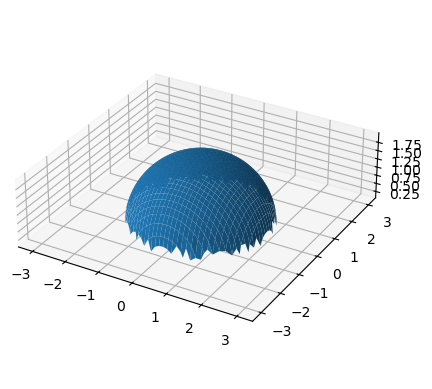

In [83]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
#maak een (lege) 3d figuur

ax.plot_surface(x,y,z)
#Teken de grafiek van de functie (een oppervlak "surface") maar toon nog niets.

ax.set_aspect('equal')
# Zorg ervoor dat de verhoudingen langs de 3 assen meetkundig juist zijn 
# (de figuur wordt meetkundig correct voorgesteld)
# Deze "ax" voegt dus een eigenschap aan de figuur toe, geen extra plot. 

plt.show()
# De grafiek die nu getekend wordt is de blauwe grafiek, 
# de bovenste helft van het boloppervlak.

In [84]:
g= lambda x,y: -np.sqrt(4-x**2-y**2) 

z=g(x,y)

C:\Users\arnog\AppData\Local\Temp\ipykernel_22904\3680138186.py:1: RuntimeWarning: invalid value encountered in sqrt
  g= lambda x,y: -np.sqrt(4-x**2-y**2)


In [105]:
ax.plot_surface(x,y,z)

ax.set_aspect('equal')

plt.show()
# Nu wordt de onderste helft van het boloppervlak getekend, de 
# software kiest voor de tweede grafiek automatisch aan andere kleur. 
# Het is dus niet nodig om zelf andere kleuren te kiezen, de liefhebbers 
# kunnen dit natuurlijk wel zelf doen (lichtroze oppervlakken enzo...),
# zie de weblink in de eerste cell. 

Merk op dat de 2 grafieken niet mooi op elkaar aansluiten. Dit komt door de beperkte resolutie van de figuur. De resolutie heb je zelf gedefinieerd in "linspace": $(-3,3,100)$ betekent van -3 tot 3 met 100 onderverdelingen (dus een rooster van 100x100
punten waarin de functiewaarden worden berekend om de grafiek te maken). Met bekomt een grotere resolutie door bijvoorbeeld een rooster 1000x1000 te kiezen:

C:\Users\arnog\AppData\Local\Temp\ipykernel_22904\1565864223.py:7: RuntimeWarning: invalid value encountered in sqrt
  f= lambda x,y : np.sqrt(4-x**2-y**2)
C:\Users\arnog\AppData\Local\Temp\ipykernel_22904\3680138186.py:1: RuntimeWarning: invalid value encountered in sqrt
  g= lambda x,y: -np.sqrt(4-x**2-y**2)


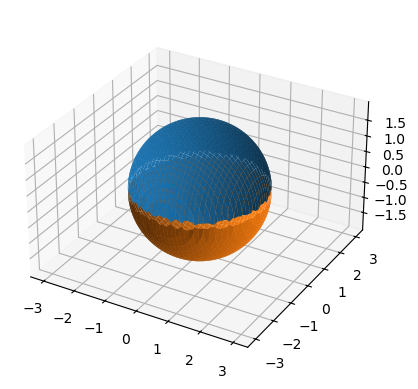

In [86]:
x=np.linspace(-3,3,1000)
y=np.linspace(-3,3,1000)
x,y=np.meshgrid(x,y)

# We maken nu een nieuwe figuur waarbij de functie in 1000x1000 punten 
# wordt berekend. Je kan hier gerust cut & paste uit een vorige cell gebruiken.
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

z=f(x,y)

ax.plot_surface(x,y,z)

ax.set_aspect('equal')

z=g(x,y)

ax.plot_surface(x,y,z)

ax.set_aspect('equal')

plt.show()

Beide grafieken sluiten nog steeds niet perfect op elkaar aan. 
Bij 2-dimensionale grafieken hadden we het commando "plot_implicit" waarmee we de grafiek van een impliciet gedefinieerde functie kunnen plotten. Bijvoorbeeld de grafiek van de cirkel $x^2 +y^2 =4$ kan direct getekend worden door de vergelijking van de cirkel te gebruiken (zie "Eenvoudige grafieken met SymPy"). 

Het zou bijzonder handig zijn als er voor 3-dimensionele grafieken ook een versie van plot_implicit zou bestaan. Dit is echter (zover ik weet) niet het geval... Om bijvoorbeeld een boloppervlak $x^2 +y^2 +z^2 =4$ te tekenen moet men dus trukjes gebruiken... Hierboven hebben we de expliciete functies uit de vergelijking gehaald en de 2 grafieken apart, maar op één figuur, getekend. Dit resultaat is zeker niet perfect.
Men kan de expliciete functies ook schrijven in poolcoördinaten. Dit geeft een beter resultaat. 

### 1.2 De punten in het $(x,y)$-vlak worden vastgelegd met poolcoördinaten $(r,\theta)$ 

We maken dezelfde figuur als hierboven maar werken nu met poolcoördinaten in plaats van met (x,y)-coördinaten.

We herdefiniëren alles, wat hieronder staat kan je dus als een volledige nieuwe notebook beschouwen.

In [87]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# raster in poolcoördinaten
r=np.linspace(0,2,1000)
# r loopt van 0 tot de straal van de bol (in het (x,y)-vlak)
theta=np.linspace(0,2*np.pi,1000)
r,theta = np.meshgrid(r,theta)
# Opmerking: we gebruiken hier een zeer grote reolutie (1000), 
# dit maakt een mooiere figuur maar dit is niet altijd noodzakelijk, 
# start bvb. met resolutie 100 en verhoog indien nodig.

f= lambda r,theta : np.sqrt(4-(r*np.cos(theta))**2 -(r*np.sin(theta))**2)
z=f(r,theta)
# Opmerking: men kan dit vereenvoudigen tot "np.sqrt(4-r^2)".

x=r*np.cos(theta)
y=r*np.sin(theta)
#Het commando "surface" gebruikt cartesische coördinaten!

fig=plt.figure()
ax=fig.add_subplot(projection='3d')
# Nieuwe figuur!

ax.plot_surface(x,y,z)

ax.set_aspect('equal')

g= lambda r,theta : -np.sqrt(4-r**2)
z=g(r,theta)

x=r*np.cos(theta)
y=r*np.sin(theta)

ax.plot_surface(x,y,z)

ax.set_aspect('equal')

plt.show()

C:\Users\arnog\AppData\Local\Temp\ipykernel_22904\1686760441.py:15: RuntimeWarning: invalid value encountered in sqrt
  f= lambda r,theta : np.sqrt(4-(r*np.cos(theta))**2 -(r*np.sin(theta))**2)


<IPython.core.display.Javascript object>

### 1.3 Algemeen geval: het oppervlak wordt beschreven met twee parameters 

In de theorie zullen we zien dat het mogelijk is een oppervlak in de 3d-ruimte te beschrijven met twee parameters. In de voorbeelden hierboven waren deze twee parameters respectievelijk $x$ en $y$ en in het tweede voorbeeld $r$ en $\theta$.

We zouden hetzelfde boloppervlak kunnen beschrijven met de parameters $z$ en $\theta$ (2 van de 3 cilindercoördinaten). 

#### Boloppervlak beschreven met de parameters $z$ en $\theta$ (2 cilindercoördinaten)

We beginnen hier weer volledig opnieuw, wat nu volgt is dus een volwaardige notebook.

In [88]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np


# We moeten nu de cilindercoördinaat r uitdrukken als functie van z en theta 
# zodat we steeds op het boloppervlak zitten
# Hiervoor is het pakket Sympy (symbolisch rekenen) handig
# Doe eerst de symbolische berekeningen en dan pas de numerieke, 
# anders kan dit conflicten veroorzaken.
# Je kan eventueel ook de symbolische berekeningen in een aparte notebook doen 
# of eventueel gewoon met de hand.

import sympy as sp
r,z,theta = sp.symbols('r z theta')
bol = (r*sp.cos(theta))**2 + (r*sp.sin(theta))**2 + z**2 -4
# Vergelijking bol met (x,y,z) vervangen door cilindercoördinaten
bol



r**2*sin(theta)**2 + r**2*cos(theta)**2 + z**2 - 4

In [89]:
r = sp.solve(bol,r)
r

[-sqrt(4 - z**2), sqrt(4 - z**2)]

In [90]:
# r is altijd positief 

r = r[1]
r

sqrt(4 - z**2)

In [91]:
# raster voor de parameters
z=np.linspace(-2,2,100)
# z gaat van -straal tot +straal
theta=np.linspace(0,2*np.pi,100)
z,theta=np.meshgrid(z,theta)

f = lambda z,theta : np.sqrt(4 - z**2)
# Het functievoorschrift moet je ofwel expliciet intikken of je kan het via 
# copy-paste uit de tweede oplossing van de vergelijking bol halen. 


In [92]:
x=f(z,theta)*np.cos(theta)
y=f(z,theta)*np.sin(theta)

fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.plot_surface(x,y,z)
ax.set_aspect('equal')
plt.show()

# Men bekomt nu één grafiek voor het boloppervlak. Dit is wat je zou bekomen als 
# er een commando "plot3d_implicit" zou bestaan. Merk op dat deze truuk niet 
# altijd voor elk mogelijk oppervlak zal werken... 

<IPython.core.display.Javascript object>

#### Hyperboloïde  beschreven met de parameters $z$ en $\theta$ (2 cilindercoördinaten)

We beginnen hier weer volledig opnieuw, wat nu volgt is dus een volwaardige notebook.

Vergelijking éénbladige hyperboloïde: $x^2 + y^2 -z^2 = 1$

In [93]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np


# We moeten nu de cilindercoördinaat r uitdrukken als functie van z en theta 
# zodat we steeds op het oppervlak zitten.
# Hiervoor is het pakket Sympy (symbolisch rekenen) handig.
# Doe eerst de symbolische berekeningen en dan pas de numerieke, anders kan dit 
# conflicten veroorzaken. Je kan eventueel ook de symbolische berekeningen in een 
# aparte notebook doen of eventueel gewoon met de hand.

import sympy as sp
r,z,theta = sp.symbols('r z theta')
hyp = (r*sp.cos(theta))**2 + (r*sp.sin(theta))**2 - z**2 -4
# Vergelijking hyperboloïde met (x,y,z) vervangen door cilindercoördinaten
hyp


r**2*sin(theta)**2 + r**2*cos(theta)**2 - z**2 - 4

In [94]:
r = sp.solve(hyp,r)
r

[-sqrt(z**2 + 4), sqrt(z**2 + 4)]

In [95]:
# De tweede oplossing is positief: cut & paste in de functiedefinitie van f 

#raster voor de parameters
z=np.linspace(-10,10,100)
theta=np.linspace(0,2*np.pi,100)
z,theta=np.meshgrid(z,theta)

f = lambda z,theta : np.sqrt(z**2 + 4)


In [96]:
x=f(z,theta)*np.cos(theta)
y=f(z,theta)*np.sin(theta)

fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.plot_surface(x,y,z)
ax.set_aspect('equal')
plt.show()


<IPython.core.display.Javascript object>

## 2 Contourplot van een functie van 2 veranderlijken $z=f(x,y)$ 

We berekenen de contourplot van de functie $z=f(x,y)=10-(x+y^2)$ 

Wat hieronder volgt is weer een verse start, dus een volwaardige notebook.

In [97]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-2,2,100)
y=np.linspace(-2,2,100)
x,y=np.meshgrid(x,y)

f= lambda x,y : 10-(x+y**2)
# Gebruik "Lambda" om de functie te definiëren, NIET het commando "def". 
# Dit laatste kan tot softwareconflicten leiden. 
    
z=f(x,y)


In [98]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.plot_surface(x,y,z)

ax.set_aspect('equal')

plt.show()

<IPython.core.display.Javascript object>

In [99]:
# Maak nieuwe figuur
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.contour(x,y,z)
plt.show()

<IPython.core.display.Javascript object>

Een contourplot is hier altijd een 3d-plot.
Je kan de projectie op het (x,y)-vlak bekijken door de interactieve grafiek te roteren tot "elevation=90°", dan
kijk je van bovenaf op de figuur. Dit is de meest eenvoudige manier om een 2d-contourplot te bekomen.

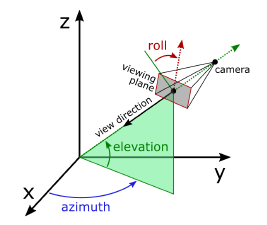

Als alternatief kan je ook manueel instellen dat je de figuur van bovenaf bekijkt.
De hoeken "elevation", "azimuth" en "roll" zijn aangeduid in de figuur hierboven. 

In [100]:
# Nieuwe figuur
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.view_init(elev=90,azim=0,roll=0)

ax.contour(x,y,z)

<IPython.core.display.Javascript object>

In [101]:
# Je kan de figuur nog wat opkuisen door te stellen "gebruik orthogonale projectie", 
# op die manier zie je de opstaande (x,z) en (y,z)-vlakken niet meer. 

# Nieuwe figuur
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.view_init(elev=90,azim=0,roll=0)

ax.set_proj_type('ortho')

ax.contour(x,y,z)

<IPython.core.display.Javascript object>

## 3. Plotten van een ruimtekromme

Een ruimtekromme wordt gedefinieerd met behulp van een plaatsvector die functie is van een parameter $t$:
$\vec{r}(t)=x(t)\vec{e}_x +y(t)\vec{e}_y +z(t)\vec{e}_z$ 

We beginnen weer volledig opnieuw. Wat hieronder staat is dus zoals een nieuwe notebook.


In [102]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Bereik parameter t
t=np.linspace(0,10,100)

# componenten van de plaatsvector
x=2*t
y=t**2 -t+1
z=5*np.sin(t)

# Nieuwe figuur
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.plot(x,y,z)

# Geef de kromme meetkundig juist weer (een éénheid is even groot langs de x-as, 
# y-as en z-as)
ax.set_aspect('equal')

plt.show()

<IPython.core.display.Javascript object>

Voor deze grafiek en voor alle voorgaande grafieken is het ook mogelijk om de assen te benoemen. Afhankelijk van het vraagstuk dat je oplost is dit overbodige luxe of een zeer goed hulpmiddel... 

In [103]:
# Nieuwe figuur
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

ax.plot(x,y,z)

ax.set_aspect('equal')

# Benoem de assen
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

<IPython.core.display.Javascript object>

## 4. Een beetje vanalles door elkaar met wat extraatjes


In [104]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Nieuwe figuur
fig=plt.figure()
ax=fig.add_subplot(projection='3d')

# *****************************************************************

# Plotten van een vlak 

x=np.linspace(-15,15,100)
y=np.linspace(-15,15,100)
x,y=np.meshgrid(x,y)

f = lambda x,y : 2-(1/2)*x+y 
z=f(x,y)
# Vergelijking vlak: z=2-x/2+y

ax.plot_surface(x,y,z,alpha=0.4)
# De alpha-parameter regelt de doorzichtigheid van een object in een figuur: 
# alpha=1 (zo goed als niet doorzichtig), 
# alpha=0 (volledig doorzichtig: bijna onzichtbaar)

ax.set_aspect('equal')


# *****************************************************************
# Plotten van een ruimtekromme

# Bereik parameter t
t=np.linspace(-40,40,1000)

# componenten van de plaatsvector
x=3*np.cos(t)
y=6*np.sin(t)
z=t/2

ax.plot(x,y,z,color='black')

# ******************************************************************

# Plotten van de hyperboloïde x^2 + y^2 -z^2 =1 met behulp van de 
# cilindercoördinaten z en theta als parameters. 

z=np.linspace(-15,15,100)
theta=np.linspace(0,2*np.pi,100)
z,theta=np.meshgrid(z,theta)

f = lambda z,theta : np.sqrt(z**2 + 4)

x=f(z,theta)*np.cos(theta)
y=f(z,theta)*np.sin(theta)

ax.plot_wireframe(x,y,z,color='red')
# Teken de grafiek niet als een gesloten oppervlak maar als een 
# dradennet ("kiekendraad"). 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

<IPython.core.display.Javascript object>

Merk op dat er hier nog een schoonheidsfoutje optreedt dat lastig kan zijn bij oefeningen: de ruimtekromme gaat door het vlak en door de hyperboloïde, maar dat is niet altijd goed te zien op de figuur! 